<a href="https://colab.research.google.com/github/Sharmila94/Chennai-House-Price-Prediction/blob/main/chenni_house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/train-chennai-sale.csv'

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/train-chennai-sale.csv')

In [ ]:
data.shape

(7109, 22)

In [ ]:
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


**Droping the unwanted columns**

In [ ]:
data = data.drop(columns = ['PRT_ID'])

In [ ]:
data.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


**Finding the datatypes of the columns**

In [ ]:
data.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

**AREA**


In [ ]:
data.AREA.values

array(['Karapakkam', 'Anna Nagar', 'Adyar', ..., 'Velachery',
       'Karapakkam', 'Velachery'], dtype=object)

In [ ]:
data.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [ ]:
data.AREA.replace('Karapakam','Karapakkam', inplace=True)
data.AREA.replace('karapakkam','Karapakkam', inplace=True)
data.AREA.replace('Adyr','Adyar', inplace=True)
data.AREA.replace('KKNagar','KK Nagar', inplace=True)
data.AREA.replace('TNagar','T Nagar', inplace=True)
data.AREA.replace('Ann Nagar','Anna Nagar', inplace=True)
data.AREA.replace('Ana Nagar','Anna Nagar', inplace=True)
data.AREA.replace('Chrompt','Chrompet', inplace=True)
data.AREA.replace('Chormpet','Chrompet', inplace=True)
data.AREA.replace('Chrmpet','Chrompet', inplace=True)
data.AREA.replace('Velchery','Velachery', inplace=True)


In [ ]:
data.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [ ]:
data.AREA.isnull().sum()

0

**INT_SQFT** 


In [ ]:
data.INT_SQFT.describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

Here minimum sqft is 500
maximum sqft is 7100

In [ ]:
data.INT_SQFT.isnull().sum()

0

In [ ]:
data.DATE_SALE.isnull().sum()

0

**TO CALCULATE THE AGE OF THE BUILDING**

In [ ]:
data.DATE_BUILD = pd.to_datetime(data.DATE_BUILD)
data.DATE_SALE = pd.to_datetime(data.DATE_SALE)

In [ ]:
data.DATE_BUILD = data.DATE_BUILD.dt.year
data.DATE_SALE = data.DATE_SALE.dt.year


In [ ]:
data["B_AGE"] = data.DATE_SALE - data.DATE_BUILD

In [ ]:
data.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,B_AGE
0,Karapakkam,1004,2011,131,1.0,1.0,3,AbNormal,Yes,1967,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,44
1,Anna Nagar,1986,2006,26,2.0,1.0,5,AbNormal,No,1995,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,11
2,Adyar,909,2012,70,1.0,1.0,3,AbNormal,Yes,1992,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,20
3,Velachery,1855,2010,14,3.0,2.0,5,Family,No,1988,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,22
4,Karapakkam,1226,2009,84,1.0,1.0,3,AbNormal,Yes,1979,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,30


In [ ]:
data = data.drop(columns=['DATE_BUILD','DATE_SALE'])

In [ ]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,B_AGE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,44
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,11
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,22
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,30


In [ ]:
data.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'B_AGE'],
      dtype='object')

**DISTANCE FROM MAINROAD**

In [ ]:
data.DIST_MAINROAD.describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

In [ ]:
data.DIST_MAINROAD.isnull().sum()

0

**NO OF BEDROOMS**

In [ ]:
data.N_BEDROOM.describe()

count    7108.000000
mean        1.637029
std         0.802902
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: N_BEDROOM, dtype: float64

In [ ]:
data.N_BEDROOM.isnull().sum()


1

In [ ]:
data = data.fillna(data['N_BEDROOM'].mode()[0])

In [ ]:
data.N_BEDROOM.isnull().sum()


0

In [ ]:
data.N_BEDROOM.describe()

count    7109.000000
mean        1.636939
std         0.802881
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: N_BEDROOM, dtype: float64

**NO OF ROOMS**

In [ ]:
data.N_ROOM.isnull().sum()

0

**NO OF BATHROOM**

In [ ]:
data.N_BATHROOM.describe()

count    7109.000000
mean        1.213110
std         0.409534
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: N_BATHROOM, dtype: float64

In [ ]:
data.N_BATHROOM.isnull().sum()

0

**SALE_COND**

In [ ]:
data.SALE_COND.isnull().sum()

0

In [ ]:
data.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [ ]:
data.SALE_COND.replace('Ab Normal','Abnormal',inplace = True)
data.SALE_COND.replace('AbNormal','Abnormal',inplace = True)
data.SALE_COND.replace('Adj Land','AdjLand',inplace = True)
data.SALE_COND.replace('Partiall','Partial',inplace = True)
data.SALE_COND.replace('PartiaLl','Partial',inplace = True)




In [ ]:
data.SALE_COND.unique()

array(['Abnormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

**PARK_FACIL**

In [ ]:
data.PARK_FACIL.isnull().sum()

0

In [ ]:
data.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [ ]:
data.PARK_FACIL.replace('Noo','No',inplace = True)

In [ ]:
data.PARK_FACIL.unique()

array(['Yes', 'No'], dtype=object)

**BUILDTYPE**

In [ ]:
data.BUILDTYPE.isnull().sum()

0

In [ ]:
data.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [ ]:
data.BUILDTYPE.replace('Other','Others',inplace = True)
data.BUILDTYPE.replace('Comercial','Commercial',inplace = True)


In [ ]:
data.BUILDTYPE.unique()

array(['Commercial', 'Others', 'House'], dtype=object)

**STREET**

In [ ]:
data.STREET.isnull().sum()

0

In [ ]:
data.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [ ]:
data.STREET.replace('Pavd','Paved',inplace = True)
data.STREET.replace('NoAccess','No Access',inplace = True) 

In [ ]:
data.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

**UTILITY_AVAIL**

In [ ]:
data.UTILITY_AVAIL.isnull().sum()

0

In [ ]:
data.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [ ]:
data.UTILITY_AVAIL.replace('AllPub','All Pub',inplace = True)

In [ ]:
data.UTILITY_AVAIL.unique()

array(['All Pub', 'ELO', 'NoSewr ', 'NoSeWa'], dtype=object)

**QS_OVERALL**

In [ ]:
data.QS_OVERALL.isnull().sum()

0

In [ ]:
data = data.fillna(data['QS_OVERALL'].mean())

In [ ]:
data.QS_OVERALL.isnull().sum()

0

**SALES_PRICE**

In [ ]:
data.SALES_PRICE.isnull().sum()

0

In [ ]:
data.SALES_PRICE.describe()

count    7.109000e+03
mean     1.089491e+07
std      3.768603e+06
min      2.156875e+06
25%      8.272100e+06
50%      1.033505e+07
75%      1.299390e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

In [ ]:
data = data.drop(columns=['REG_FEE','COMMIS'])

In [ ]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,B_AGE
0,Karapakkam,1004,131,1.0,1.0,3,Abnormal,Yes,Commercial,All Pub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2.0,1.0,5,Abnormal,No,Commercial,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1.0,1.0,3,Abnormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1.0,1.0,3,Abnormal,Yes,Others,All Pub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


**VIZUALIZATION OF DATA**

In [ ]:
#A=data.AREA.groupby(data.AREA).count()
#A=data.AREA.groupby(data.AREA).count()
#A=data.AREA.groupby(data.AREA).count()
#A=data.AREA.groupby(data.AREA).count()
#A=data.AREA.groupby(data.AREA).count()
#A=data.AREA.groupby(data.AREA).count()

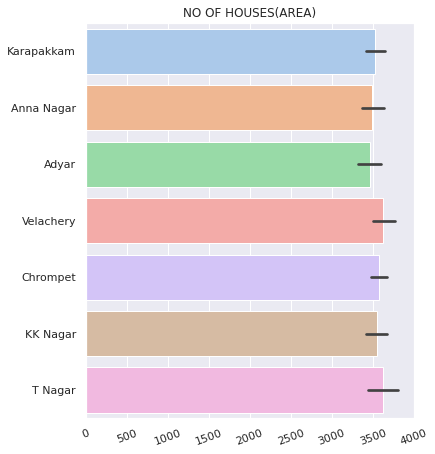

In [ ]:
sns.set_theme(style="darkgrid", palette="pastel")
plt.figure(figsize=(20,16))
plt.subplot(231)
sns.barplot(x=data.AREA.index,y=data.AREA.values,data = data)
plt.xticks(rotation=20)
plt.title('NO OF HOUSES(AREA)')
plt.show()


Text(0.5, 1.0, 'TOTAL HOUSES(PARKING FACILITY)')

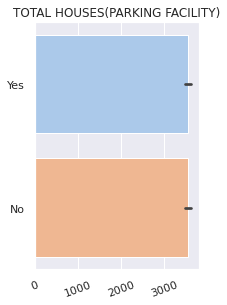

In [ ]:
sns.set_theme(style="darkgrid", palette="pastel")
plt.figure(figsize=(10,10))
plt.subplot(232)
sns.barplot(x=data.PARK_FACIL.index,y=data.PARK_FACIL.values,data = data)
plt.xticks(rotation=20)
plt.title('TOTAL HOUSES(PARKING FACILITY)')



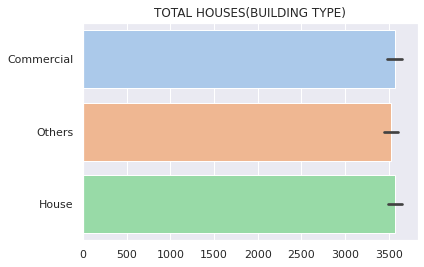

In [ ]:
#plt.subplot(233)
#sns.barplot(x=data.BUILDTYPE.index,y=data.BUILDTYPE.values,data = data)
#plt.xticks(rotation=15)
plt.title('TOTAL HOUSES(BUILDING TYPE)')
sns.barplot(x=data.BUILDTYPE.index,y=data.BUILDTYPE.values,data = data)
plt.show()

Text(0.5, 1.0, 'TOTAL HOUSES(UTILITY AVAILABLE)')

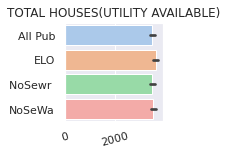

In [ ]:
plt.subplot(233)
sns.barplot(x=data.UTILITY_AVAIL.index,y=data.UTILITY_AVAIL.values,data = data)
plt.xticks(rotation=15)
plt.title('TOTAL HOUSES(UTILITY AVAILABLE)')


Text(0.5, 1.0, 'TOTAL HOUSES(NATURE OF STREET)')

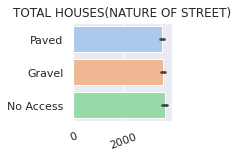

In [ ]:
plt.subplot(234)
sns.barplot(x=data.STREET.index,y=data.STREET.values,data = data)
plt.xticks(rotation=20)
plt.title('TOTAL HOUSES(NATURE OF STREET)')


Text(0.5, 1.0, 'TOTAL HOUSES(NATURE OF ZONE)')

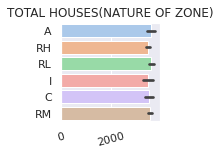

In [ ]:
plt.subplot(235)
sns.barplot(x=data.MZZONE.index,y=data.MZZONE.values,data = data)
plt.xticks(rotation=15)
plt.title('TOTAL HOUSES(NATURE OF ZONE)')


**FEATURE VS TARGET**

---



Text(0.5, 1.0, 'TO FIND AREA VS SALESPRICE')

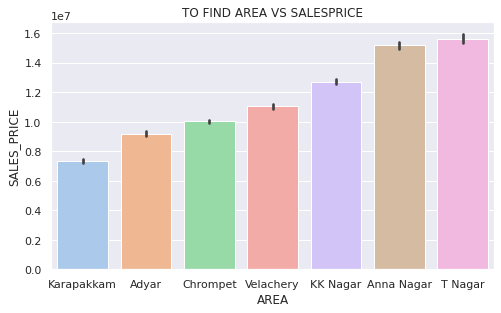

In [ ]:
plt.figure(figsize=(27,10))
plt.subplot(231)
sns.barplot(x=data.AREA,y=data.SALES_PRICE,order=data.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title("TO FIND AREA VS SALESPRICE")

Text(0.5, 1.0, 'TO FIND PARKING FACILITY VS SALESPRICE')

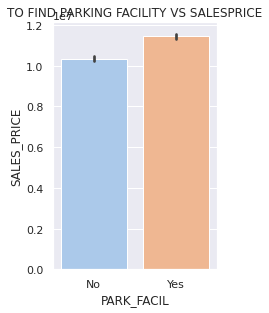

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(231)
sns.barplot(x=data.PARK_FACIL,y=data.SALES_PRICE,order=data.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])
plt.title("TO FIND PARKING FACILITY VS SALESPRICE")

Text(0.5, 1.0, 'TO FIND UTILITY_AVAILABLE VS SALESPRICE')

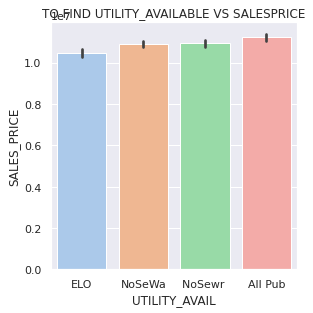

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(231)
sns.barplot(x=data.UTILITY_AVAIL,y=data.SALES_PRICE,order=data.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.title("TO FIND UTILITY_AVAILABLE VS SALESPRICE")

Text(0.5, 1.0, 'TO FIND AREA VS SALESPRICE')

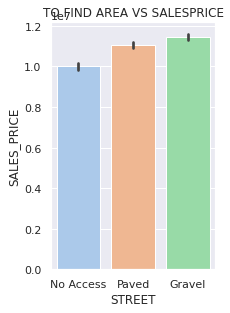

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(231)
sns.barplot(x=data.STREET,y=data.SALES_PRICE,order=data.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.title("TO FIND AREA VS SALESPRICE")

Text(0.5, 1.0, 'TO FIND MZZONE VS SALESPRICE')

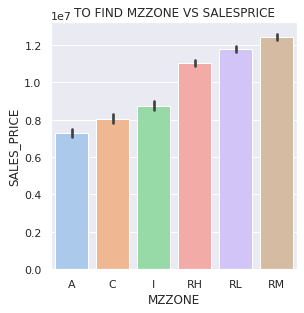

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(231)
sns.barplot(x=data.MZZONE,y=data.SALES_PRICE,order=data.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title("TO FIND MZZONE VS SALESPRICE")

Text(0.5, 1.0, 'TO FIND TYPE OF BUILDING VS SALESPRICE')

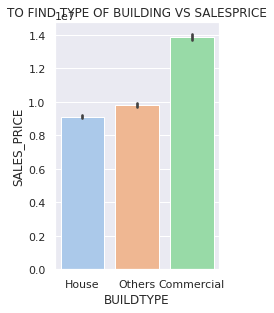

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(231)
sns.barplot(x=data.BUILDTYPE,y=data.SALES_PRICE,order=data.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.title("TO FIND TYPE OF BUILDING VS SALESPRICE")

In [ ]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,B_AGE
0,Karapakkam,1004,131,1.0,1.0,3,Abnormal,Yes,Commercial,All Pub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2.0,1.0,5,Abnormal,No,Commercial,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1.0,1.0,3,Abnormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1.0,1.0,3,Abnormal,Yes,Others,All Pub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


**Numerical and Continuous Data Split**

In [ ]:
Numerical_features=[feature for feature in data.columns if data[feature].dtypes !='O']
Numerical_features

['INT_SQFT',
 'DIST_MAINROAD',
 'N_BEDROOM',
 'N_BATHROOM',
 'N_ROOM',
 'QS_ROOMS',
 'QS_BATHROOM',
 'QS_BEDROOM',
 'QS_OVERALL',
 'SALES_PRICE',
 'B_AGE']

In [ ]:
Continuous_features=[feature for feature in data.columns if data[feature].dtypes == 'O']
Continuous_features

['AREA',
 'SALE_COND',
 'PARK_FACIL',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE']

**EDA OF NUMERICAL DATA**

In [ ]:
target = data.SALES_PRICE

Text(0.5, 1.0, 'INT_SQFT VS SALES_PRICE')

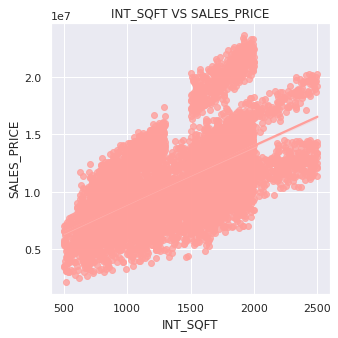

In [ ]:
plt.figure(figsize=(5,5))
sns.regplot(x=data.INT_SQFT,y=target,color ='r')
plt.title('INT_SQFT VS SALES_PRICE')

**There is a linear relationship between sales price and int_sqft.So INT_SQFT increases sales price increases**








Text(0.5, 1.0, 'DIST_MAINROAD VS SALES_PRICE')

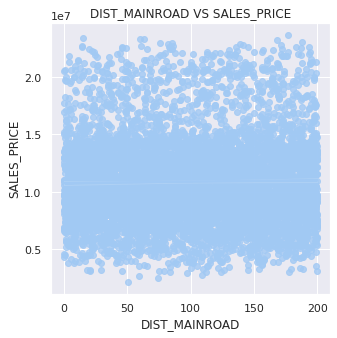

In [ ]:
plt.figure(figsize=(5,5))
sns.regplot(x=data.DIST_MAINROAD,y=target,color ='b')
plt.title('DIST_MAINROAD VS SALES_PRICE')

**There is no linear relationship between sales price and DIST_MAINROAD.**


Text(0.5, 1.0, 'N_BEDROOM VS SALES_PRICE')

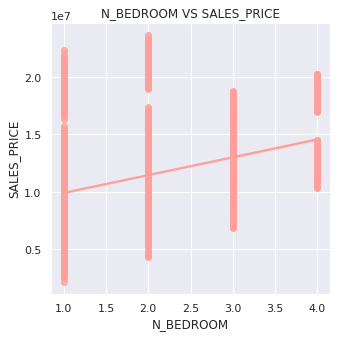

In [ ]:
plt.figure(figsize=(5,5))
sns.regplot(x=data.N_BEDROOM,y=target,color ='r')
plt.title('N_BEDROOM VS SALES_PRICE')

**There is a linear relationship between sales price and N_BEDROOM.So if N_BEDROOM increases sales price also increases**


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:359: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  color = mpl.colors.rgb2hex(mpl.colors.colorConverter.to_rgb(color))


Text(0.5, 1.0, 'N_BATHROOM VS SALES_PRICE')

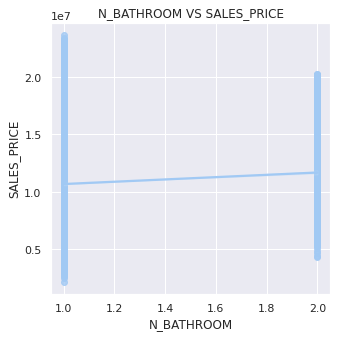

In [ ]:
plt.figure(figsize=(5,5))
sns.regplot(x=data.N_BATHROOM,y=target,color ='B')
plt.title('N_BATHROOM VS SALES_PRICE')

**There is a linear relationship between sales price and N_BATHROOM.So if N_BATHROOM increases sales price increases**


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:359: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  color = mpl.colors.rgb2hex(mpl.colors.colorConverter.to_rgb(color))


Text(0.5, 1.0, 'N_ROOM VS SALES_PRICE')

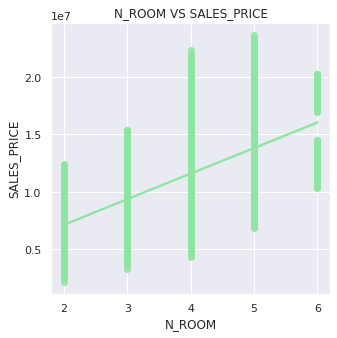

In [ ]:
plt.figure(figsize=(5,5))
sns.regplot(x=data.N_ROOM,y=target,color ='G')
plt.title('N_ROOM VS SALES_PRICE')

**There is a linear relationship between sales price and N_ROOM.So if N_ROOM increases sales price also increases**


Text(0.5, 1.0, 'QS_ROOMS VS SALES_PRICE')

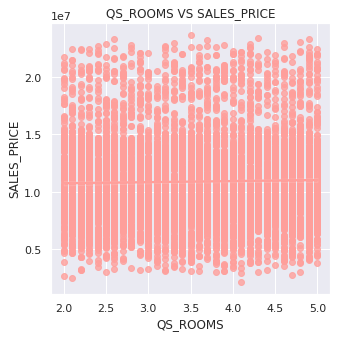

In [ ]:
plt.figure(figsize=(5,5))
sns.regplot(x=data.QS_ROOMS,y=target,color ='r')
plt.title('QS_ROOMS VS SALES_PRICE')

**There is no linear relationship between sales price and QS_ROOMS.**

Text(0.5, 1.0, 'QS_BATHROOM VS SALES_PRICE')

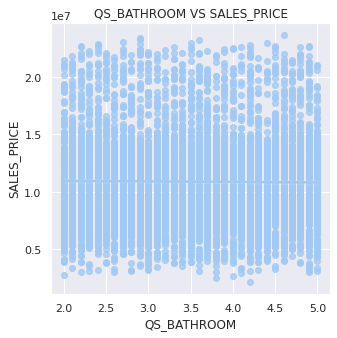

In [ ]:
plt.figure(figsize=(5,5))
sns.regplot(x=data.QS_BATHROOM,y=target,color ='B')
plt.title('QS_BATHROOM VS SALES_PRICE')

**There is a no linear relationship between sales price and QS_BATHROOM.**

Text(0.5, 1.0, 'QS_BEDROOM VS SALES_PRICE')

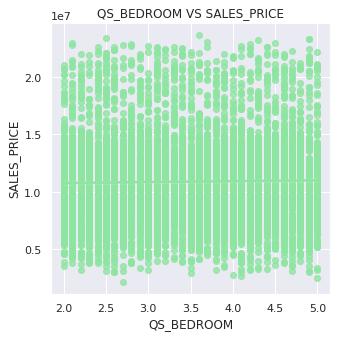

In [ ]:
plt.figure(figsize=(5,5))
sns.regplot(x=data.QS_BEDROOM,y=target,color ='G')
plt.title('QS_BEDROOM VS SALES_PRICE')

**There is no linear relationship between sales price and QS_BEDROOM.**

Text(0.5, 1.0, 'B_AGE VS SALES_PRICE')

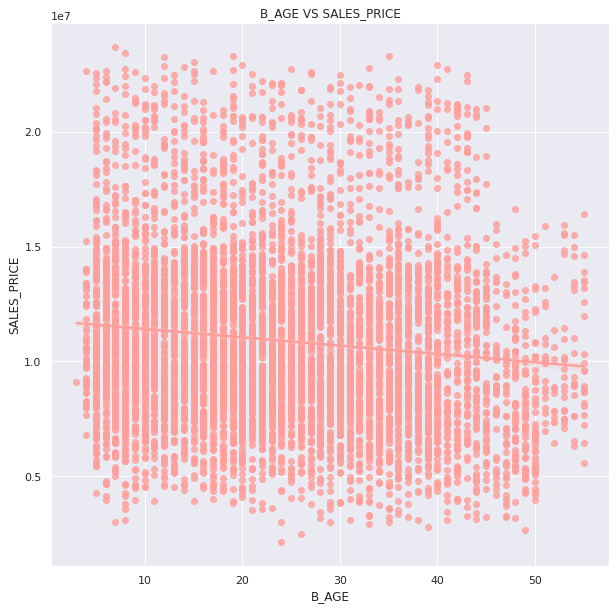

In [ ]:
plt.figure(figsize=(10,10))
sns.regplot(x=data.B_AGE,y=target,color ='r')
plt.title('B_AGE VS SALES_PRICE')

**There is a linear relationship between sales price and B_AGE.So if B_AGE increases sales price decreases**


**EDA OF CATEGORICAL DATA**

Text(0.5, 1.0, 'TO FIND AREA VS SALESPRICE')

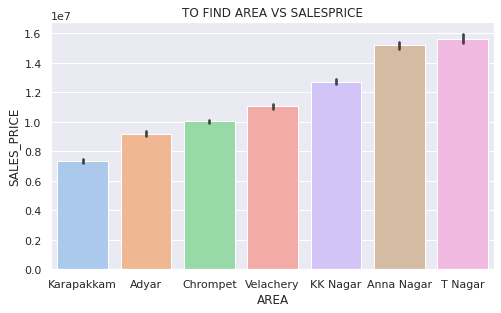

In [ ]:
plt.figure(figsize=(27,10))
plt.subplot(231)
sns.barplot(x=data.AREA,y=data.SALES_PRICE,order=data.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title("TO FIND AREA VS SALESPRICE")

Text(0.5, 1.0, 'TO FIND SALE CONDITION VS SALESPRICE')

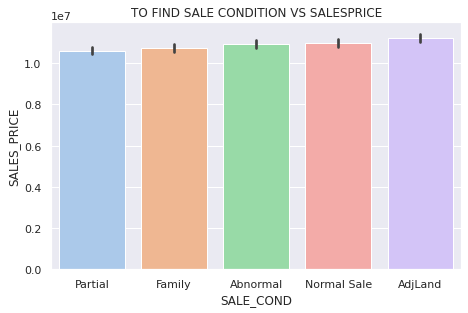

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(232)
sns.barplot(x=data.SALE_COND,y=data.SALES_PRICE,order=data.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.title("TO FIND SALE CONDITION VS SALESPRICE")

Text(0.5, 1.0, 'TO FIND PARKING FACILITY VS SALESPRICE')

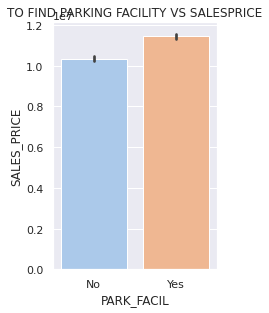

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(233)
sns.barplot(x=data.PARK_FACIL,y=data.SALES_PRICE,order=data.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])
plt.title("TO FIND PARKING FACILITY VS SALESPRICE")

Text(0.5, 1.0, 'TO FIND BUILDING TYPE VS SALESPRICE')

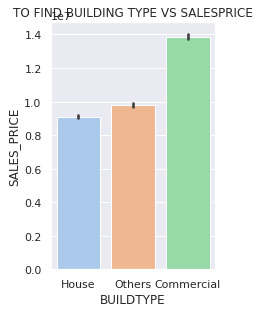

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(234)
sns.barplot(x=data.BUILDTYPE,y=data.SALES_PRICE,order=data.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.title("TO FIND BUILDING TYPE VS SALESPRICE")

Text(0.5, 1.0, 'TO FIND UTILITY_AVAILABLE VS SALESPRICE')

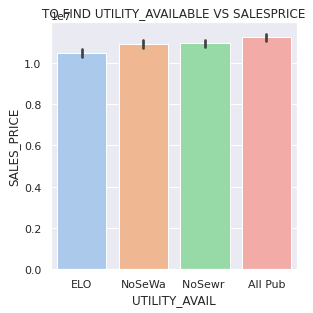

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(235)
sns.barplot(x=data.UTILITY_AVAIL,y=data.SALES_PRICE,order=data.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.title("TO FIND UTILITY_AVAILABLE VS SALESPRICE")

Text(0.5, 1.0, 'TO FIND STREET VS SALESPRICE')

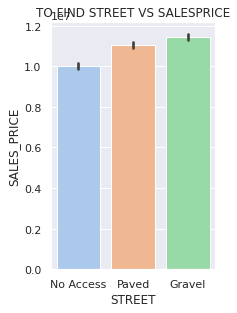

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(236)
sns.barplot(x=data.STREET,y=data.SALES_PRICE,order=data.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.title("TO FIND STREET VS SALESPRICE")

Text(0.5, 1.0, 'TO FIND MZZONE VS SALESPRICE')

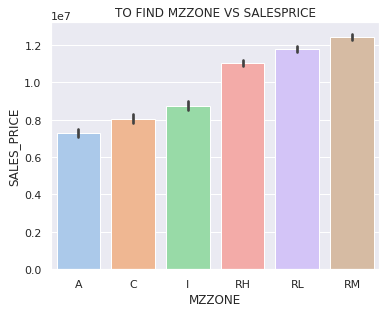

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(236)
sns.barplot(x=data.MZZONE,y=data.SALES_PRICE,order=data.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title("TO FIND MZZONE VS SALESPRICE")

**ENCODING**

AREA shows a linear relationship hence linear encoding is done

In [ ]:
data.AREA= data.AREA.map({'Karapakkam':1,'Adyar':2,'Chrompet':3,'Velachery':4,'KK Nagar':5,'Anna Nagar':6,'T Nagar':7})

SALE_COND shows a linear relationship hence label encoding is done

In [ ]:
data.SALE_COND=data.SALE_COND.map({'Partial':1,'Family':2,'Abnormal':3,'Normal Sale':4,'AdjLand':5})

PARK_FACIL shows a linear relationship hence label encoding is done 

In [ ]:
data.PARK_FACIL=data.PARK_FACIL.map({'No':1,'Yes':2})

BUILDTYPE shows a slight linear relationship hence label encoding is done

> Indented block



In [ ]:
#data.BUILDTYPE=data.BUILDTYPE.map({'House':1,'Others':2,'Commercial':4})

UTILITY_AVAILABLE shows a linear relationship hence label encoding is done

In [ ]:
data.UTILITY_AVAIL=data.UTILITY_AVAIL.map({'ELO':1,'NoSeWa':2,'NoSewr ':3,'All Pub':4})

STREET shows a linear relationship hence label encoding is done 

In [ ]:
data.STREET=data.STREET.map({'No Access':1,'Paved':2,'Gravel':3})

MZZONE shows a linear relationship hence label encoding is done 

In [ ]:
data.MZZONE=data.MZZONE.map({'A':1,'C':2,'I':3,'RH':5,'RL':6,'RM':7})

BUILDTYPE has no linear relationship hence onehot encoding is done

In [ ]:
onehot = pd.get_dummies(data.BUILDTYPE).astype(int)
data = data.join(onehot)

In [ ]:
data.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'B_AGE', 'Commercial', 'House', 'Others'],
      dtype='object')

In [ ]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,B_AGE,Commercial,House,Others
0,1,1004,131,1.0,1.0,3,3,2,Commercial,4,...,1,4.0,3.9,4.9,4.330,7600000,44,1,0,0
1,6,1986,26,2.0,1.0,5,3,1,Commercial,4,...,5,4.9,4.2,2.5,3.765,21717770,11,1,0,0
2,2,909,70,1.0,1.0,3,3,2,Commercial,1,...,6,4.1,3.8,2.2,3.090,13159200,20,1,0,0
3,4,1855,14,3.0,2.0,5,2,1,Others,3,...,3,4.7,3.9,3.6,4.010,9630290,22,0,0,1
4,1,1226,84,1.0,1.0,3,3,2,Others,4,...,2,3.0,2.5,4.1,3.290,7406250,30,0,0,1


In [ ]:
data=data.drop(columns= ['BUILDTYPE','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL'])

In [ ]:
data.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET',
       'MZZONE', 'SALES_PRICE', 'B_AGE', 'Commercial', 'House', 'Others'],
      dtype='object')

In [ ]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,B_AGE,Commercial,House,Others
0,1,1004,131,1.0,1.0,3,3,2,4,2,1,7600000,44,1,0,0
1,6,1986,26,2.0,1.0,5,3,1,4,3,5,21717770,11,1,0,0
2,2,909,70,1.0,1.0,3,3,2,1,3,6,13159200,20,1,0,0
3,4,1855,14,3.0,2.0,5,2,1,3,2,3,9630290,22,0,0,1
4,1,1226,84,1.0,1.0,3,3,2,4,3,2,7406250,30,0,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   int64  
 1   INT_SQFT       7109 non-null   int64  
 2   DIST_MAINROAD  7109 non-null   int64  
 3   N_BEDROOM      7109 non-null   float64
 4   N_BATHROOM     7109 non-null   float64
 5   N_ROOM         7109 non-null   int64  
 6   SALE_COND      7109 non-null   int64  
 7   PARK_FACIL     7109 non-null   int64  
 8   UTILITY_AVAIL  7109 non-null   int64  
 9   STREET         7109 non-null   int64  
 10  MZZONE         7109 non-null   int64  
 11  SALES_PRICE    7109 non-null   int64  
 12  B_AGE          7109 non-null   int64  
 13  Commercial     7109 non-null   int64  
 14  House          7109 non-null   int64  
 15  Others         7109 non-null   int64  
dtypes: float64(2), int64(14)
memory usage: 888.8 KB


In [ ]:
data.N_BATHROOM = data.N_BATHROOM.astype(int)
data.N_BEDROOM = data.N_BEDROOM.astype(int)

**LINEAR REGRESSION**

In [ ]:
X = data[['AREA','INT_SQFT','DIST_MAINROAD','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL',
          'UTILITY_AVAIL','STREET','MZZONE','B_AGE','Commercial','House','Others']]
Y = data['SALES_PRICE']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn import metrics

**TRAIN_TEST**

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
X_train.shape,X_test.shape

((5687, 15), (1422, 15))

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Y_pred = regressor.predict(X_test)
Y_pred

array([11137343.02072438,  9141285.58776851, 11822694.12903825, ...,
       13385164.1477869 , 12176349.7044049 , 14134834.49709648])

In [ ]:
df = pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred})
df

,Actual,Predicted
5601,9356020,1.113734e+07
896,8414875,9.141286e+06
5133,11469350,1.182269e+07
5948,13267610,1.402562e+07
3941,11284700,1.105088e+07
...,...,...
6591,9941220,1.041217e+07
5110,13797670,1.442379e+07
3605,12430300,1.338516e+07
1706,11718800,1.217635e+07


In [ ]:
print('R2 score:',metrics.r2_score(Y_test,Y_pred))

R2 score: 0.9236997893466873


**CONCLUSION ON LINEAR REGRESSION** 

---


 We have built a linear regression model and found R2 score of 0.92.
 



---



---



---



**DECISION TREE ALGORITHM**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=1)

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train,Y_train)
dt.predict(X_test),Y_test

(array([18576840.,  5947125.,  8453795., ...,  7130000.,  9371100.,
         9671160.]), 5492    18543840
 3039     7049500
 2252     7660600
 2488    14090500
 4146     6576375
           ...   
 4994     9184130
 5874    16686780
 2011     6505500
 1380     9396600
 3906     9225240
 Name: SALES_PRICE, Length: 1422, dtype: int64)

In [ ]:
Y_pred = dt.predict(X_test)
MSE_dt= mean_squared_error(Y_test,Y_pred)
rsquared = r2_score(Y_test,Y_pred)
RSME_dt = MSE_dt ** (1/2)
print('test set RSME of dt:{:.2f}'.format(RSME_dt))
print('test set r2 of dt:{:.2f}'.format(rsquared))

test set RSME of dt:648047.12
test set r2 of dt:0.97


**CONCLUSION ON DECISION TREE ALGORITHM**


---



We have built decision tree model and found r2 score of 0.97.
the observation is our model is giving results based on 97% of data.
Decision tree is a good validation model for price of house prediction in Chennai City.

The main key features here are **AREA,N_ROOMS,N_BEDROOMS,N_BATHROOMS,B_AGE**
 .Here our training model can explain **97% of data**.

**KNN ALGORITHM**

---



In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
%matplotlib inline

In [ ]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)

In [ ]:
X_train.shape,X_test.shape

((5687, 15), (1422, 15))

In [ ]:
rmse_val = []
for K in range(30):
  K=K+1
  dt = neighbors.KNeighborsRegressor(n_neighbors = K)
  dt.fit(X_train, Y_train)
  pred=dt.predict(X_test) 
  error = sqrt(mean_squared_error(Y_test,pred)) 
  rmse_val.append(error) 
  print('RMSE value for k= ' , K , 'is:', error)



RMSE value for k=  1 is: 3812103.47959679
RMSE value for k=  2 is: 3417355.8808255005
RMSE value for k=  3 is: 3257647.990451769
RMSE value for k=  4 is: 3173541.5367125045
RMSE value for k=  5 is: 3084574.0237341
RMSE value for k=  6 is: 3031459.877721203
RMSE value for k=  7 is: 3019185.4844422597
RMSE value for k=  8 is: 2989020.0223816484
RMSE value for k=  9 is: 2971369.116528523
RMSE value for k=  10 is: 2954699.429078745
RMSE value for k=  11 is: 2946799.8155131205
RMSE value for k=  12 is: 2939021.739654389
RMSE value for k=  13 is: 2929170.417924542
RMSE value for k=  14 is: 2911544.0855154167
RMSE value for k=  15 is: 2907346.5505962363
RMSE value for k=  16 is: 2898269.1189762386
RMSE value for k=  17 is: 2893263.249548543
RMSE value for k=  18 is: 2890425.9923204146
RMSE value for k=  19 is: 2889959.2055337154
RMSE value for k=  20 is: 2891775.1145702954
RMSE value for k=  21 is: 2891402.7031468735
RMSE value for k=  22 is: 2898436.57648676
RMSE value for k=  23 is: 2901857

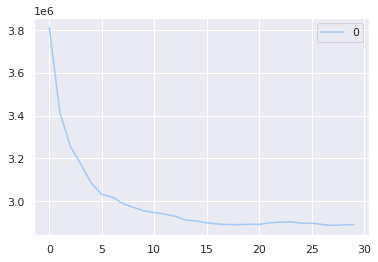

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,20,30,40,50]}

knn = neighbors.KNeighborsRegressor()

dt = GridSearchCV(knn, params, cv=5)
dt.fit(X_train,Y_train)
dt.best_params_


{'n_neighbors': 50}